In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


from IPython.display import Image
from convex_nmf import convex_nmf
from standard_nmf import StandardNMF
from utils import compute_sparsity

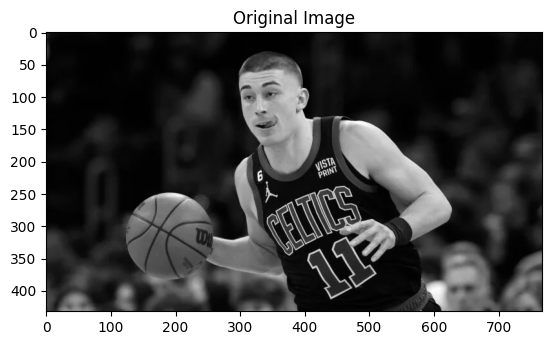

In [2]:
path = f'{os.getcwd()}/data_files/prichard.png'
img = cv2.imread(path)
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Noramlize image so NMF can be computed more easily
normalized_grayscale_img = grayscale_img / 255

plt.imshow(normalized_grayscale_img, cmap = 'gray')
plt.title('Original Image')
plt.show()

In [3]:
ranks = [5, 10, 15, 100]

### Rank 5 ###


  0%|          | 0/5000 [00:00<?, ?it/s]

  3%|▎         | 148/5000 [00:01<00:55, 87.54it/s]


Convergence achieved at iteration 148...
Proportion of non-zero elements for G_T and W: 0.6997395833333333, 0.6822916666666666
### Rank 10 ###


  7%|▋         | 326/5000 [00:03<00:53, 88.12it/s]


Convergence achieved at iteration 326...
Proportion of non-zero elements for G_T and W: 0.5200520833333333, 0.279296875
### Rank 15 ###


  5%|▌         | 251/5000 [00:03<01:05, 72.48it/s]


Convergence achieved at iteration 251...
Proportion of non-zero elements for G_T and W: 0.5510416666666667, 0.4556423611111111
### Rank 100 ###


 14%|█▎        | 683/5000 [00:12<01:21, 52.72it/s]


Convergence achieved at iteration 683...
Proportion of non-zero elements for G_T and W: 0.292890625, 0.18299479166666666


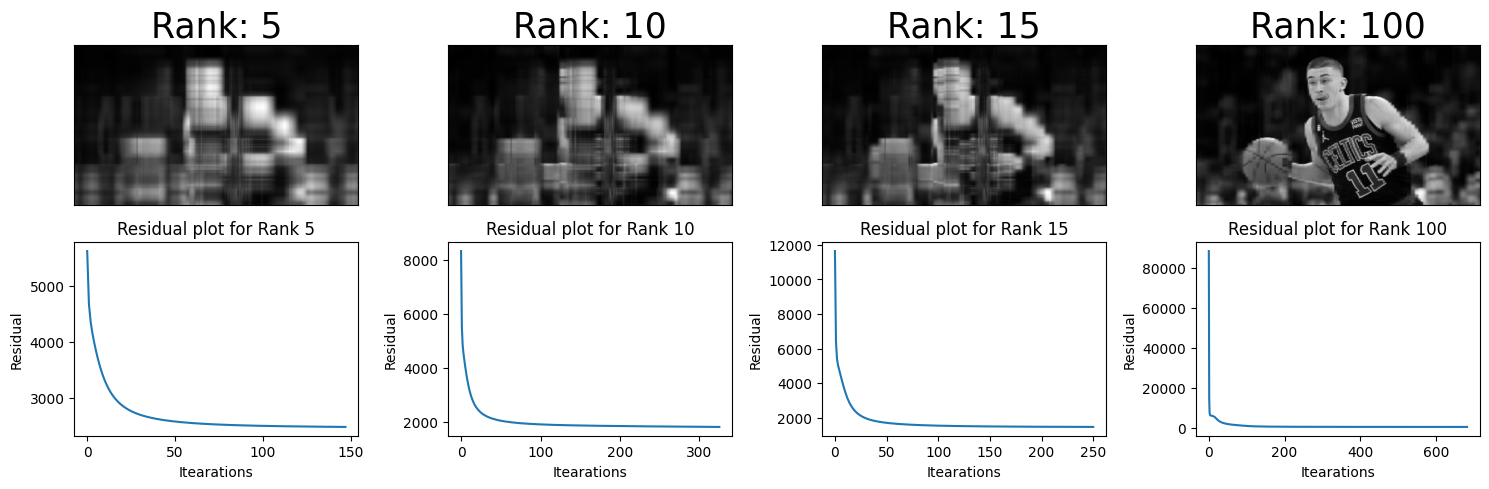

In [6]:
# Convex NMF
n_plots = len(ranks)
fig, ax = plt.subplots(2, n_plots, figsize=[15, 5])

n = 0
for rank in ranks:
    print(f'### Rank {rank} ###')
    F, W, G_T, residual_vector = convex_nmf(normalized_grayscale_img, rank, tol = 1e-4, max_iter=5000, random_state=100)
    G_T_sparse, num_non_zero_G = compute_sparsity(G_T)
    W_sparse, num_non_zero_W = compute_sparsity(W)
    print(f'Proportion of non-zero elements for G_T and W: {num_non_zero_G}, {num_non_zero_W}')
    ax[0][n].imshow(F @ G_T, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(rank), fontsize=25)

    ax[1][n].plot(residual_vector)
    ax[1][n].set_xlabel('Itearations')
    ax[1][n].set_ylabel('Residual')
    ax[1][n].set_title(f'Residual plot for Rank {rank}')

    n += 1

plt.tight_layout()

## Rank: 5 ##


  1%|▏         | 73/5000 [00:00<00:07, 624.29it/s]


Convergence achieved at iteration 73...
Proportion of non-zero elements for W and H: 0.8870370370370371, 0.8690104166666667
## Rank: 10 ##


  3%|▎         | 150/5000 [00:00<00:06, 697.16it/s]


Convergence achieved at iteration 150...
Proportion of non-zero elements for W and H: 0.7016203703703704, 0.7459635416666667
## Rank: 15 ##


  5%|▌         | 251/5000 [00:00<00:07, 646.71it/s]


Convergence achieved at iteration 251...
Proportion of non-zero elements for W and H: 0.6060185185185185, 0.6782118055555556
## Rank: 100 ##


 28%|██▊       | 1419/5000 [00:03<00:08, 411.40it/s]


Convergence achieved at iteration 1419...
Proportion of non-zero elements for W and H: 0.3540277777777778, 0.5939322916666666


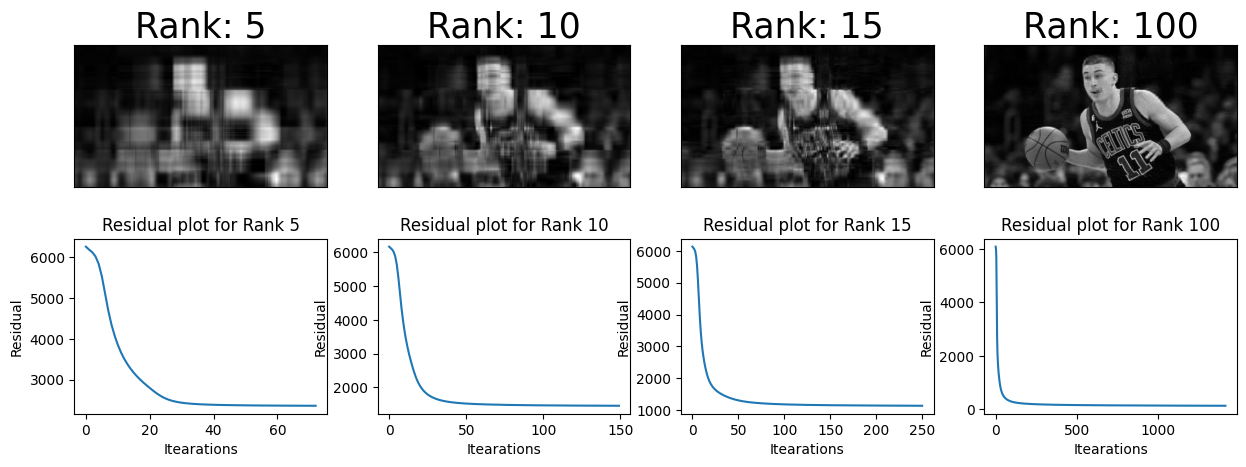

In [7]:
# Standard NMF
n_plots = len(ranks)
fig, ax = plt.subplots(2, n_plots, figsize=[15, 5])
n = 0
for rank in ranks:
    print(f'## Rank: {rank} ##')
    model = StandardNMF(normalized_grayscale_img, num_bases=rank, n_iter=5000, tol = 1e-4, random_state = 100)
    W, H, residual_vector = model.factorize()
    W_sparse, num_non_zero_W = compute_sparsity(W)
    H_sparse, num_non_zero_H = compute_sparsity(H)
    print(f'Proportion of non-zero elements for W and H: {num_non_zero_W}, {num_non_zero_H}')
    ax[0][n].imshow(W @ H, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(rank), fontsize=25)

    ax[1][n].plot(residual_vector)
    ax[1][n].set_xlabel('Itearations')
    ax[1][n].set_ylabel('Residual')
    ax[1][n].set_title(f'Residual plot for Rank {rank}')

    n += 1